## Ch06 Surprise 패키지 사용

Python에는 CF와 MF 기반 추천 시스템을 구현하고 테스트해 볼 수 있는 Surprise 패키지가 존재한다.

### 6.1 Surprise 기본 활용 방법

Surprise 라이브러리에는 ml-100K, ml-1m, jester 3가지 데이터가 내장되어 있다.  
Surprise 라이브러리에서 제공하는 알고리즘은 다음과 같다.

|알고리즘|설명|
|---|---|
|random_pred.NormalPredictor|Training set의 분포가 정규분포라고 가정한 상태에서 평점을 <br/> 무작위로 추출하는 알고리즘. 일반적으로 성능이 안좋음|
|baseline_only.BaselineOnly|사용자의 평점평균과 아이템의 평점평균을 모델화해서 <br/> 예측하는 알고리즘|
|knns.KNNBASIC|3.4에서 설명한 이웃을 고려한 기본적인 CF 알고리즘|
|knns.KNNWithMeans|3.6에서 설명한 사용자의 평가경향을 고려한 CF 알고리즘|
|knns.KNNWithZScore|사용자의 평가경향을 표준화시킨 CF 알고리즘|
|knns.KNNBaseline|사용자의 평점평균과 아이템의 평점평균을 모델화시킨 것 <br/> (Baseline rating)을 고려한 CF 알고리즘|
|matrix_factorization.SVD|4.4에서 설명한 MF 알고리즘|
|matrix_factorization.SVDpp|MF를 기반으로 사용자의 특정 아이템에 대한 평가여부를 이진값으로 <br/> 일종의 암묵적 평가(implicit ratings)로 추가한 SVD++ 알고리즘|
|matrix_factorization.NMF|행렬의 값이 전부 양수일 때 사용 가능한 MF 알고리즘|
|slope_one.SlopeOne|간단하면서도 정확도가 높은 것이 특징인 SlopeOne <br/> 알고리즘을 적용한 Item-based CF 알고리즘|
|co_clustering.CoClustering|사용자와 아이템을 동시에 클러시트렁하는 기법을 적용한 CF 알고리즘|

In [1]:
import numpy as np
import pandas as pd

# 필요한 Surprise 알고리즘 불러오기
from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, NMF, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# MovieLens 100K 데이터 불러오기
data = Dataset.load_builtin('ml-100k')

# Train/Test 분리
trainset, testset = train_test_split(data, test_size= 0.25)

# 정확도 계산
algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\USER/.surprise_data/ml-100k
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9554


0.9553610603855922

### 6.2 알고리즘 비교

Surprise 의 다양한 알고리즘의 정확도를 비교해보자.  
BaselineOnly, KNNWithMeans, SVD, SVDpp 4가지를 비교한다.

In [3]:
# 알고리즘 비교
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []
for option in algorithms:
    algo = option()
    names.append(option.__name__)
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

Estimating biases using als...
RMSE: 0.9488
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9554
RMSE: 0.9401
RMSE: 0.9220


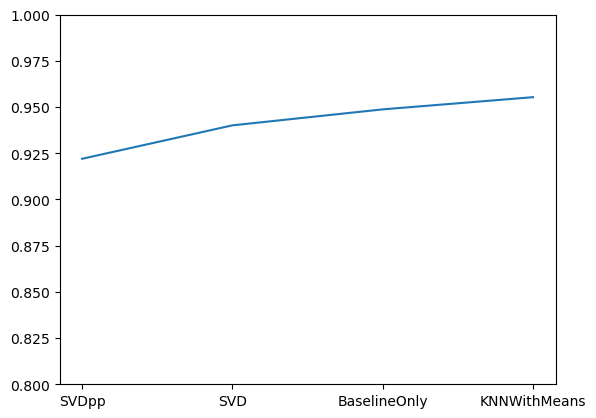

array([0.92202169, 0.94011766, 0.94876095, 0.95536106])

In [37]:
# 결과를 그래프로 표시
import matplotlib.pyplot as plt
index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
plt.show()

results[index]

### 6.3 알고리즘 옵션 지정

앞서 실행한 모델 중 KNN은 유사도 지표나 이웃크기를 기본값으로 사용하였는데 그 기본값은 이웃 크기의 기본값은 40, 유사도 지표는 MSE 임을 알 수 있다.  
이웃의 크기를 변경하고 싶거나 유사도지표를 다른 것을 사용할 필요가 있으면 어떻게 해야할까? 

In [38]:
# 알고리즘 옵션 변경, 정확도 계산
sim_options = {'name' : 'pearson_baseline', 
               'user_based' : True}
algo = KNNWithMeans(k = 30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9420


0.9419856925698297

### 6.4 다양한 조건의 비교

In [45]:
# 다양한 Neighbor size 비교 
result = []
for neighbor_size in (10, 20, 30, 40, 50, 60):
    algo = KNNWithMeans(k=neighbor_size, sim_options={'name':
           'pearson_baseline', 'user_based': True})
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])
result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9562
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9443
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9420
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9421
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9421
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9424


[[10, 0.95617787507692],
 [20, 0.9443320533803498],
 [30, 0.9419856925698297],
 [40, 0.9420935214205417],
 [50, 0.9421151723151562],
 [60, 0.9423667427679971]]

이웃 크기의 비교 뿐 아니라 다른 조건의 비교도 비슷한 방식으로 가능한데, 모든 가능한 조합을 비교하는 Grid Search 로 해결할 수 있다.

In [65]:
# KNN 다양한 파라미터 비교
from surprise.model_selection import GridSearchCV
param_grid = {'k' : [5, 10, 15, 25], 'verbose' : [False],
              'sim_options' : {'name' : ['pearson_baseline', 'cosine'],
                               'user_based' : [True, False]}}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv = 4)
gs.fit(data)

In [67]:
# 최적 RMSE 출력
print(gs.best_score)

# 최적 RMSE의 parameter
print(gs.best_params)

{'rmse': 0.9261977552639936}
{'rmse': {'k': 25, 'verbose': False, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}}


In [68]:
# SVD 다양한 파라미터 비교
param_grid = {'n_epochs' : [70, 80, 90],
              'lr_all' : [0.005, 0.006, 0.007],
              'reg_all' : [0.05, 0.07, 0.1]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv = 4)
gs.fit(data)

In [69]:
# 최적 RMSE 출력
print(gs.best_score)

# 최적 RMSE의 parameter
print(gs.best_params)

{'rmse': 0.9129749958791487}
{'rmse': {'n_epochs': 80, 'lr_all': 0.005, 'reg_all': 0.1}}


### 6.5 외부 데이터 사용

외부 데이터는 Surprise 라이브러리에 맞는 형태로 변형시켜야 한다.  
Read 클래스를 이용해 읽어오는 코드이다.

In [76]:
# csv 파일 불러오기
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./data/u.data', names=r_cols,  sep='\t',encoding='latin-1')
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Train/Test 분리
trainset, testset = train_test_split(data, test_size=0.25)

# 정확도 계산
algo = KNNWithMeans()
algo.fit(trainset)
predictions= algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9559


0.9559497646579957